### Neural Networks and Deep Learning


### **Objective**
To estimate the compressive strength of concrete based on its components and age using **multilinear regression**.

### **Data**
- **Source:** UCI Machine Learning Repository
- **Reference:** I-Cheng Yeh, *"Modeling of strength of high-performance concrete using artificial neural networks,"* Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998).
---

### **Problem Statement**
Structural engineers need to determine the strength of materials to design safe and reliable structures. As a **machine learning developer** working for an engineering company, your task is to:

1. **Analyze data** to develop a predictive model for the compressive strength of concrete.
2. Use **multilinear regression** to predict the compressive strength based on:
   - Concrete components (Cement, Slag, Fly Ash, etc.)
   - Age of the concrete (in days).
3. Provide **uncertainty estimates** for the predictions to help engineers ensure safety.

---

### 1.) Data

#### **a.) Load `Concrete_Data_Yeh.csv`**
- Load the dataset into a Pandas DataFrame.
- Print out the header to verify the data structure.
- Use `pandas.DataFrame.describe()` to summarize the data.

In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading csv file into a pandas dataframe 
data = pd.read_csv('Concrete_Data_Yeh.csv')

# Printing out the data header
data.head()


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
# Summarizing the data using .describe()
data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### **Dataset Analysis**

#### **Column 1: Cement**
- **Mean:** 281, **Standard Deviation:** 104
- **Min & Max:** The minimum value is 102, and the maximum is 540. Data points are distributed between 102 and 540.
- **Percentiles:**
  - 25% (Q1): 192 data points fall below this value.
  - 50% (Median): 273 data points fall below this value.
  - 75% (Q3): 350 data points fall below this value.
- **Distribution:** The dataset appears to be **right-skewed**, with higher values stretching farther from the mean than lower values.

---

#### **Column 2: Slag**
- **Mean:** 74, **Standard Deviation:** 86.27 (high variability).
- **Observation:** 25% of the samples have no slag.
- **Distribution:** **Left-skewed**, with many low values and few high values.

---

#### **Column 3: Fly Ash**
- **Mean:** 54.1, **Standard Deviation:** 64 (high variability).
- **Observation:** 50% of the samples contain no fly ash (\(0\)).
- **Distribution:** **Left-skewed**, as many samples do not contain fly ash.

---

#### **Column 4: Water**
- **Mean:** 181, **Standard Deviation:** 21 (low variability, most samples are close to the mean).
- **Concentration:** Most values are concentrated near the mean as observed in the percentiles (25%, 50%, 75%).
- **Distribution:** Slightly **left-skewed**, with a few samples having very low water content.

---

#### **Column 5: Superplasticizer**
- **Mean:** 6.20, **Standard Deviation:** 5.97 (low variability).
- **Min-Max:** Ranges from \(0.00\) to \(32.20\).
- **Observation:** 25% of the samples have no superplasticizer.
- **Distribution:** **Left-skewed**, with most samples near the median (\(6.40\)).

---

#### **Column 6: Coarse Aggregate**
- **Mean:** 972.92, **Standard Deviation:** 77.75 (low variability, most samples are close to the mean).
- **Min-Max:** 801.00 to 1145.00.
- **Percentiles:**
  - 25%: Below 932.
  - 75%: Below 1029.40.
- **Distribution:** **Left-skewed**, indicating consistency in coarse aggregate usage.

---

#### **Column 7: Fine Aggregate**
- **Mean:** 773.58, **Standard Deviation:** 80.18 (low variability, consistent usage in samples).

---

#### **Column 8: Age**
- **Mean:** 45.66, **Standard Deviation:** 63.17 (high variability in curing age).
- **Min-Max:** Ranges from \(1\) to \(365\) days.
- **Percentiles:**
  - 25%: Below 7 days.
  - 50% (Median): 28 days.
  - 75%: Below 56 days.
- **Distribution:** **Left-skewed**, with many samples tested at earlier curing stages.

---

### **Conclusion**
1. The dataset consists of **9 columns** with **1030 rows**, and there are **no missing values**.
2. **Variabilities:**
   - Columns like **Slag, Fly Ash, and Age** show high variability, reflecting the diversity of mixtures.
   - Columns like **Water, Coarse Aggregate, and Fine Aggregate** show low variability, reflecting consistent usage.
3. **Consistency:**
   - Water, coarse aggregate, and fine aggregate are more consistent, likely due to their standard roles in concrete production.
4. **Age Distribution:**
   - The dataset emphasizes early curing stages (median = 28 days), which heavily influence compressive strength results.
5. **Diversity in Mixes:**
   - The inclusion of mixtures with and without slag, fly ash, and superplasticizer contributes to the wide range of compressive strengths.

This dataset offers a comprehensive view of concrete mixtures and their compressive strengths, allowing for detailed modeling and analysis.


---
### **Data Cleaning and Verification**

#### **b.) Steps to Clean and Verify the Dataset**
1. **Check Data Types and Missing Values:**
   - Use `pandas.DataFrame.info()` to ensure all entries have the correct data types and check for missing values.
   - Missing values can disrupt analysis, so they need to be addressed.

2. **Check for Duplicate Entries:**
   - Use `pandas.DataFrame.duplicated()` to identify duplicate rows in the dataset.
   - Duplicate rows can skew results and must be removed.

3. **Fix Issues:**
   - **Missing Values:** If any missing values are found, replace them with appropriate strategies such as:
     - **Mean or Median Imputation** for numerical features.
     - **Zero Imputation** if missing values represent absence.
   - **Duplicate Rows:** Remove all duplicate rows using `pandas.DataFrame.drop_duplicates()`.
   - **Incorrect Data Types:** Convert columns to their correct data types if mismatches are detected.

---

In [4]:
# Data Data types
data.dtypes

cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarseaggregate     float64
fineaggregate       float64
age                   int64
csMPa               float64
dtype: object

In [5]:
# Summing the missing values of our data frame.isna=is detecting missing values
data.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [6]:
# Checking for duplicate entried using .duplicated
print(data.duplicated().value_counts())

False    1005
True       25
dtype: int64


In [7]:
# Printing the duplicated data 
duplicates = data[data.duplicated()]
print(duplicates)

     cement   slag  flyash  water  superplasticizer  coarseaggregate  \
77    425.0  106.3     0.0  153.5              16.5            852.1   
80    425.0  106.3     0.0  153.5              16.5            852.1   
86    362.6  189.0     0.0  164.9              11.6            944.7   
88    362.6  189.0     0.0  164.9              11.6            944.7   
91    362.6  189.0     0.0  164.9              11.6            944.7   
100   425.0  106.3     0.0  153.5              16.5            852.1   
103   425.0  106.3     0.0  153.5              16.5            852.1   
109   362.6  189.0     0.0  164.9              11.6            944.7   
111   362.6  189.0     0.0  164.9              11.6            944.7   
123   425.0  106.3     0.0  153.5              16.5            852.1   
126   425.0  106.3     0.0  153.5              16.5            852.1   
132   362.6  189.0     0.0  164.9              11.6            944.7   
134   362.6  189.0     0.0  164.9              11.6            9

In [8]:
# Dropping the duplicated data using drop_duplicates and modfying the original dataset directly by setting inplace=True. 
# I dropped the duplicated values because we dont need them.

data.drop_duplicates(inplace=True)

In [9]:
# Checking the dataset again for duplicates
# Resulting in 0 duplicates now. 
data.duplicated().sum()

0

In [10]:
data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


#### **Observations and Actions**
1. **Data Types:**
   - Checked data types for all columns and confirmed they match the expected formats:
     - Numerical columns like Cement, Slag, Fly Ash, etc., are correctly set as `float` or `integer`.
     - No incorrect data types were found.

2. **Missing Values:**
   - No missing values were found in the dataset (as per the dataset description and verification).

3. **Duplicate Entries:**
   - Identified duplicate rows in the dataset using `pandas.DataFrame.duplicated()`.
   - Observed a few duplicate rows, likely due to repeated measurements.

4. **Fixes Applied:**
   - Removed all duplicate rows using `pandas.DataFrame.drop_duplicates()`.
   - Re-checked the dataset to confirm no missing values or duplicates remain.

---

#### **Conclusion**
- The dataset is now clean and ready for analysis.
- It contains no missing values, duplicate rows, or incorrect data types.
---

### **Exploratory Data Analysis (EDA)**

#### **Correlation Matrix**
- Use `seaborn.heatmap` to visualize the correlation matrix of the dataset.
- The correlation matrix helps identify relationships between features and the target variable (compressive strength).

##### **Steps:**
1. Calculate the correlation matrix using `pandas.DataFrame.corr()`.
2. Display the heatmap using `sns.heatmap`, ensuring it is annotated for clarity.

---

In [11]:
# Use seaborn.heatmap to display the correlation matrix of the features
heatmap_ = data.corr()
heatmap_

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
flyash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplasticizer,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarseaggregate,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fineaggregate,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
csMPa,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


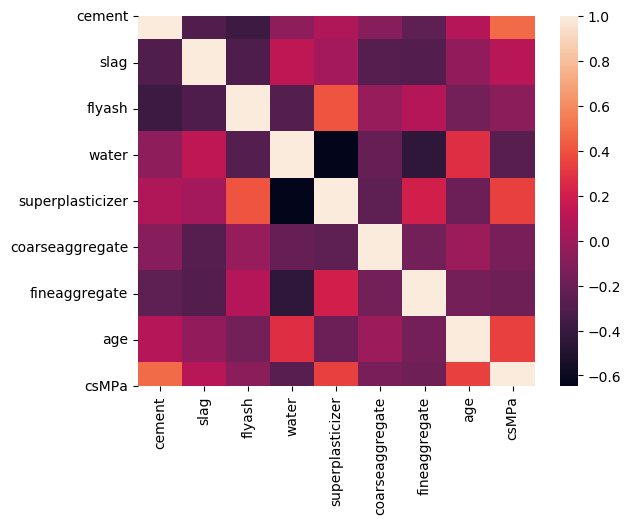

In [12]:
sns.heatmap(heatmap_)

#### **Scatter Plots and Histograms**
- Use `seaborn.pairplot` to generate scatter plots and histograms for all features.
- Scatter plots show the relationships between pairs of features.
- Histograms help analyze the distribution of each feature.

##### **Steps:**
1. Use `sns.pairplot` on the dataset.
2. Highlight compressive strength (target variable) against each feature.

---

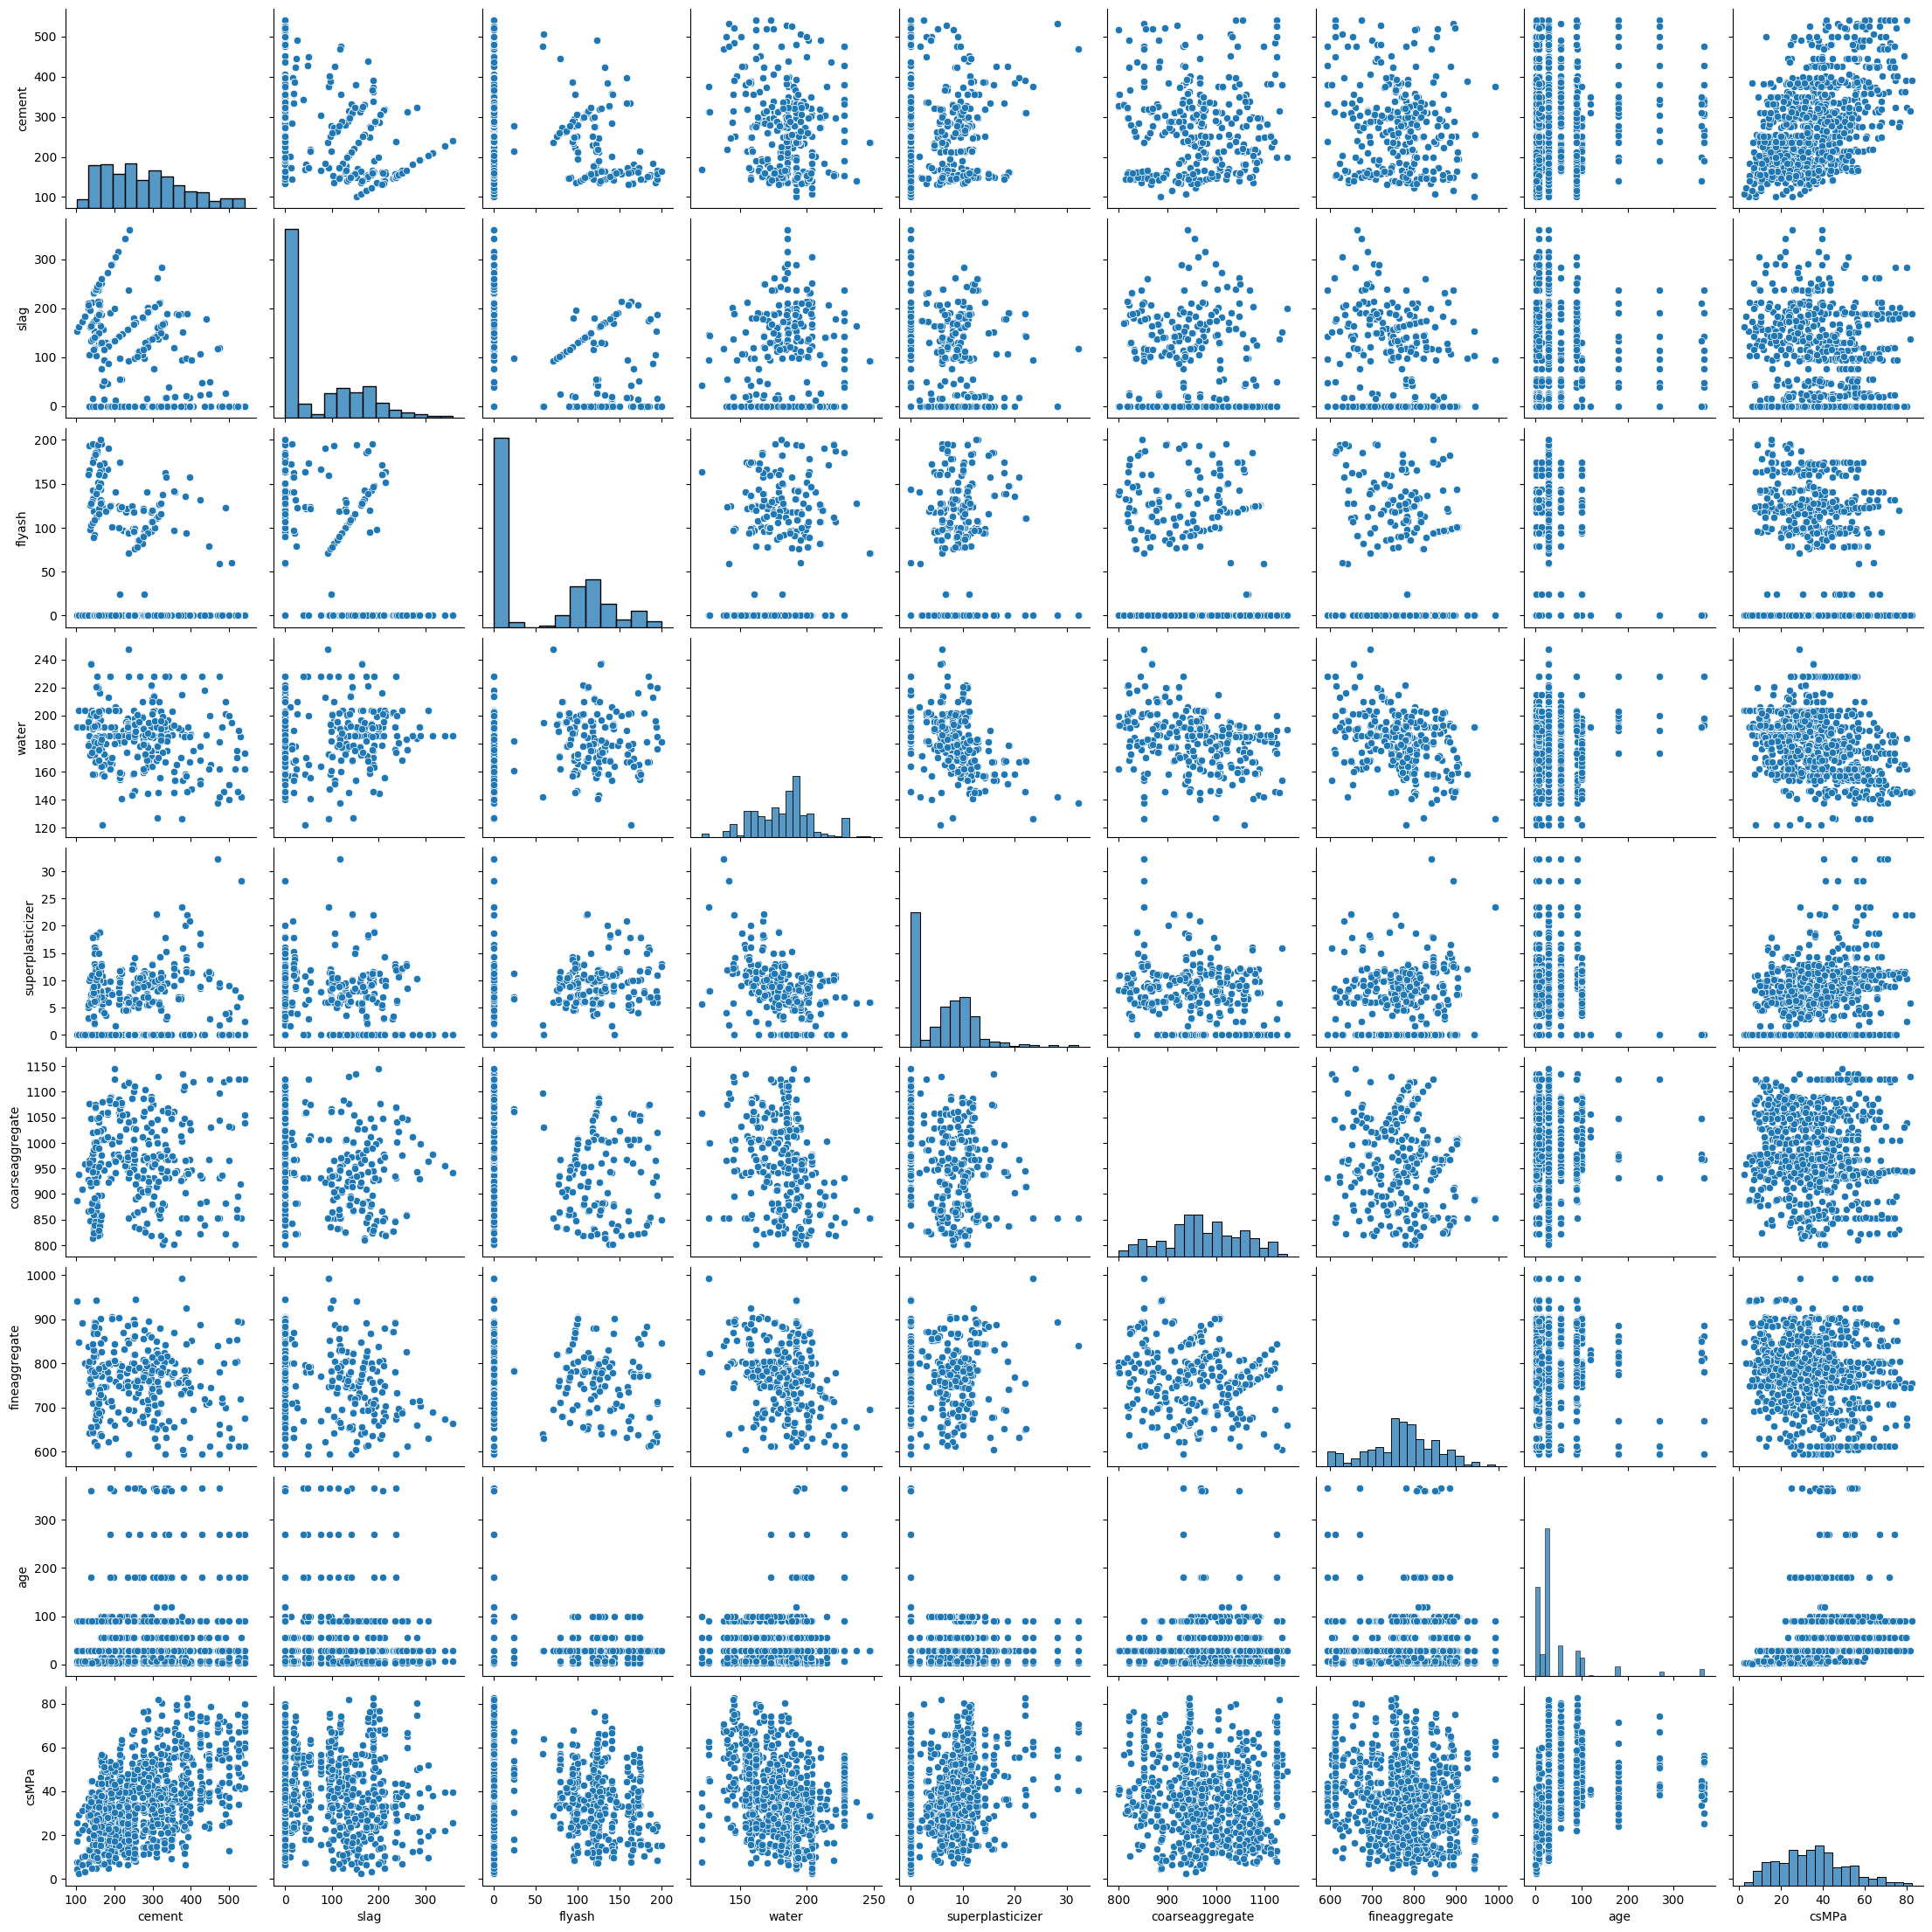

In [13]:
# Use seaborn.pairplot to generate scatter plots and histograms
sns.pairplot(data)

---

### **Insights and Key Features for Modeling**
1. **Highly Correlated Features:**
   - **Cement, Superplasticizer, and Age** are the most influential features and should be prioritized in the model.

2. **Moderately Correlated Feature:**
   - **Water** has a significant negative correlation, indicating its role in reducing strength if used excessively.

3. **Weak Correlations:**
   - Features such as **slag, fly ash, coarse aggregate, and fine aggregate** have weaker correlations. However, they might contribute to compressive strength when interacting with other features.

---

### **Conclusion**
The features **cement, superplasticizer, and age** play critical roles in determining compressive strength. Proper optimization of these variables can significantly enhance model predictions. On the other hand, the weakly correlated features might still contribute indirectly and should not be entirely disregarded in the analysis.

---

### **Data Preparation**

#### **Steps for Data Preparation:**
1. **Separate Labels:**
   - Move the target variable (`csMPa`) to a separate DataFrame. This ensures the labels are not included in the scaling process.
---

In [14]:
# Features into a dataframe called 'features'
features = data.drop(columns = ['csMPa'])

# Move the labels (Target) to a separate dataframe called 'label'. Only label here is 'csMPa'
label = data['csMPa']

2. **Scale the Features:**
   - Use `sklearn.preprocessing.MinMaxScaler` to scale the feature values to a range of [0, 1].
   - Scaling helps normalize the feature ranges, which is essential for models sensitive to feature magnitudes.


In [15]:
# Use sklearn.preprocessing.MinMaxScaler to scale the features (but not the labels).
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Converting scaled_features into a dataframe for better readability
features_df = pd.DataFrame(scaled_features, columns=features.columns)

In [16]:
features_df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,0.403268,0.200455,0.277543,0.481432,0.187368,0.504002,0.448290,0.123233
std,0.238229,0.239763,0.320879,0.170442,0.183850,0.225522,0.201557,0.175095
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.202511,0.000000,0.000000,0.357827,0.000000,0.380814,0.326894,0.016484
50%,0.372146,0.055648,0.000000,0.510383,0.189441,0.485465,0.466633,0.074176
75%,0.563927,0.396494,0.591204,0.567891,0.310559,0.668605,0.572504,0.151099
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


3. **Split the Data:**
   - Split the dataset into training and testing subsets.
   - Allocate **90%** of the data for training and **10%** for testing to ensure the model is evaluated on unseen data.

In [17]:
# Split the data so that 10% is used for testing and 90% for training.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_df, label, test_size = 0.1, train_size = .90, random_state = 42)



In [18]:
X_train

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
576,0.541096,0.000000,0.000000,0.600639,0.000000,0.485465,0.469142,0.035714
215,0.291553,0.000000,0.590705,0.586262,0.189441,0.660174,0.410437,0.005495
604,0.223744,0.000000,0.000000,0.464856,0.000000,0.941860,0.629704,0.074176
548,0.271233,0.409572,0.000000,0.510383,0.000000,0.738372,0.377070,0.016484
290,0.342009,0.000000,0.499250,0.194089,0.385093,0.595930,0.767185,0.005495
...,...,...,...,...,...,...,...,...
106,0.538584,0.525876,0.000000,0.424121,0.295031,0.417733,0.405921,0.016484
270,0.152740,0.117418,0.621189,0.291534,0.335404,0.813372,0.507275,0.005495
860,0.116438,0.403450,0.564718,0.448882,0.248447,0.191860,0.577020,0.074176
435,0.143836,0.357540,0.660170,0.425719,0.251553,0.595349,0.382840,0.271978


### 2.) Modeling

### **Data Conversion to TensorFlow Variables**

#### **Objective**
Convert the training and testing datasets into TensorFlow-compatible formats:
- Save the target variable (`csMPA`) as a 2D TensorFlow variable.
- Save the feature variables as a separate 2D TensorFlow variable.

---

#### **Steps:**
1. Extract the target variable (`csMPA`) from both the training and testing datasets.
2. Convert both the target and feature variables to TensorFlow `tf.Variable` objects.
3. Ensure the target variable is reshaped to a 2D format to match TensorFlow requirements.

---

In [19]:
# This will convert into a matrix format
# For both the train and test datasets, save the csMPA column (the label y) as a 2d tensorflow variable
# Since I have reshaped my labels to a 2d shape above, I do not need to convert data type to float 32

X_train_2d = tf.Variable(X_train.values, dtype=tf.float32)
y_train_2d = tf.Variable(y_train.values.reshape(-1, 1), dtype=tf.float32)
X_test_2d = tf.Variable(X_test.values, dtype=tf.float32)
y_test_2d = tf.Variable(y_test.values.reshape(-1, 1), dtype=tf.float32)

In [20]:
# Checking if datases are 2d and is converted into float34
print(f'The shape of label test data and data type: {y_test_2d.shape}, {y_test_2d.dtype}')
print(f'The shape of label train data and data type: {y_train_2d.shape},{y_train_2d.dtype} ')
print(f'The shape of X test data and data type: {X_test_2d.shape}, {X_test_2d.dtype}')
print(f'The shape of X train data and data type: {X_train_2d.shape}, {X_train_2d.dtype}')

The shape of label test data and data type: (101, 1), <dtype: 'float32'>
The shape of label train data and data type: (904, 1),<dtype: 'float32'> 
The shape of X test data and data type: (101, 8), <dtype: 'float32'>
The shape of X train data and data type: (904, 8), <dtype: 'float32'>


### **Implementing Multilinear Regression with TensorFlow**

---

#### **b. Initialize Weights and Bias**
- Use `tf.zeros` to create TensorFlow variables for the weights (\( w \)) and bias (\( b \)).
- The shape of \( w \) should match the number of features, and \( b \) should match the number of outputs.
---

In [21]:
# Learning rate
learning_rate = 1.2

# Optimizer
optimizer = tf.optimizers.SGD(learning_rate)



# b.) part a: There are 8 input variables, and 1 output variable (label = 'csMPa')
Number_of_features = X_train_2d.shape[1]
Number_of_output = y_train_2d.shape[1]


# b.) part b: weights and bias
weight = tf.Variable(tf.zeros([Number_of_features, Number_of_output]))
bias = tf.Variable(tf.zeros([Number_of_output]))

In [22]:
print(weight)

<tf.Variable 'Variable:0' shape=(8, 1) dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)>


In [23]:
print(bias)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


### **c. Regression Function**

#### **Objective**
Implement the equation \( z = xw + b \) to compute predictions for the model. The function will take the features (\( x \)), weights (\( w \)), and bias (\( b \)) as inputs and return the predicted values (\( z \)).

---

In [24]:
# c.) Regression function
def regression_function(x):
    ''' This function computes the weighted sum of features for each sample and adds a constant offset to the result.
    Together, this represents the equation of a linear model
    '''
    
    z = tf.matmul(x, weight) + bias 
    return z                                            

### **d. Loss Function**
The loss function calculates the difference between the true labels (\( y \)) and the predicted values (\( \hat{y} \)). It is implemented as a lambda function that computes the **Mean Absolute Error (MAE)**:
\[
\text{Loss} = |y - \hat{y}|
\]
The MAE represents the average magnitude of errors in the predictions without considering their direction. This helps quantify how far off the predictions are from the actual values.

---

### **e. Train Function**
The train function uses the **Stochastic Gradient Descent (SGD)** optimizer to minimize the loss function with respect to the weights (\( w \)) and bias (\( b \)). The training process involves:
1. Iteratively updating \( w \) and \( b \) to minimize the error over **1000 epochs**.
2. Choosing an appropriate learning rate to control the step size for parameter updates.
3. Monitoring the loss at regular intervals (e.g., every 100 epochs) to track the training progress and ensure convergence.

---

In [25]:
# e.) Creating a 'train function'                                           
def train(i):
    ''' 
    This function returns the final values of the trained weight and bias
    '''
    
    for n in range(i):
        # d.) Loss function using MAE(Mean Absolute Error)
        loss = lambda: tf.reduce_mean(tf.abs(y_train_2d - regression_function(X_train_2d)))
        optimizer.minimize(loss, [weight, bias])
        
    return weight, bias

### **f. Model Evaluation**
After training, evaluate the model as follows:
1. **Trained Weights and Bias:** Print the final values of \( w \) and \( b \) to understand the parameters learned by the model.
2. **Prediction for Training Data:** Use the regression function to predict the compressive strength (\( z \)) for each row in the training dataset.
3. **Root Mean Squared Error (RMSE):** 
   - Calculate RMSE, which quantifies the average magnitude of prediction errors in terms of the square root of the mean of squared differences.
   - RMSE provides a clear measure of how well the model fits the data, with lower values indicating better performance.


In [26]:
# Printing the final trained weight and bias from with 1500 iterations 
trained_weight, trained_bias = train(1200)
print(f'The Trained Weights: {trained_weight.numpy()}')
print(f'The Trained Bias: {trained_bias.numpy()}')

The Trained Weights: [[ 41.36012  ]
 [ 22.134771 ]
 [  6.87644  ]
 [-18.296371 ]
 [ 20.346704 ]
 [ -1.6116898]
 [ -2.6893506]
 [ 39.960934 ]]
The Trained Bias: [14.399854]


In [27]:
# Predicted strength for the training data 'X_train_2d'
y_train_pred = regression_function(X_train_2d)
#print(f'Predicted Strength for Training Data: {y_train_pred.numpy()}')

In [28]:
# Calculate RMSE
def calculate_rmse(y_true, y_pred):
    ''' This function returns the Root Mean Squared Error (RMSE) between the 
    true values (y_true) and the predicted values (y_pred).

    RMSE measures the average magnitude of the prediction errors. It is computed as the square 
    root of the mean of the squared differences between the true and predicted values.
    '''
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

In [29]:
# RMSE for training data
train_rmse = calculate_rmse(y_train_2d, y_train_pred)
print(f'Training RMSE: {train_rmse.numpy()}')

Training RMSE: 10.357966423034668


### 3.) Conclusion

### **Making Predictions on Test Data**

#### **Objective**
Use the trained model to make predictions for the test dataset. These predictions will help evaluate the model's performance on unseen data.

---

#### **Steps:**
1. **Regression Function:**
   - Use the previously defined regression function to compute predictions for the test features (\( X_{\text{test}} \)) using the trained weights (\( w \)) and bias (\( b \)).

In [30]:
# Predict for test data and calculate RMSE
y_test_pred = regression_function(X_test_2d)
test_rmse = calculate_rmse(y_test_2d, y_test_pred)
print(f'Testing RMSE: {test_rmse.numpy()}')

Testing RMSE: 11.17790412902832


2. **Identify Deviations Larger than RMSE:**
   - Compare each deviation to the RMSE value.
   - Count the number of deviations that exceed the RMSE.


In [31]:
def percentage_deviations(y_true, y_pred):
    '''
    Calculate the percentage of deviations |y - y_hat| that are larger than the RMSE.

    Parameters:
    y_true: True values (labels).
    y_pred: Predicted values.

    Returns:
    float: Percentage of deviations larger than RMSE.
    '''
    
    # Compute residuals y - y_hat
    residuals = tf.abs(y_true - y_pred)

    # Compute RMSE
    rmse = tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

    # Count the number of residuals larger than RMSE
    count_larger_than_rmse = tf.reduce_sum(tf.cast(residuals > rmse, tf.float32))

    # Total number of samples
    total_samples = tf.cast(tf.size(y_true), tf.float32)

    # Percentage of deviations larger than RMSE
    percentage = (count_larger_than_rmse / total_samples) * 100
    return percentage.numpy()

3. **Calculate Percentage:**
   - Compute the percentage of these large deviations relative to the total number of predictions:
     \[
     \text{Percentage} = \frac{\text{Count of Deviations > RMSE}}{\text{Total Predictions}} \times 100
     \]

---

In [32]:
# For train data
percentage_train = percentage_deviations(y_train_2d, y_train_pred)
print(f'Percentage of deviations larger than RMSE (Training): {percentage_train}')

# For test data
percentage_test = percentage_deviations(y_test_2d, y_test_pred)
print(f'Percentage of deviations larger than RMSE (Testing): {percentage_test}')

Percentage of deviations larger than RMSE (Training): 32.079647064208984
Percentage of deviations larger than RMSE (Testing): 27.7227725982666


### **Summary**

#### **Objective**
The objective is to estimate the compressive strength of concrete based on its components and age using multilinear regression. The predictions are essential for structural engineers to design safe structures, and the model must provide an uncertainty measure to account for potential deviations.

#### **Dataset Overview**
- **Number of Instances:** 1030
- **Number of Attributes:** 9 (8 features and 1 target variable)
- **Features:**
  - Cement, Blast Furnace Slag, Fly Ash, Water, Superplasticizer, Coarse Aggregate, Fine Aggregate, Age
  - All features are quantitative.
- **Target Variable:** Concrete Compressive Strength (MPa)
- **No Missing Values**

---

#### **Model Performance Metrics**
- **Percentage of Deviations Larger than RMSE (Training):** 32.08%
- **Percentage of Deviations Larger than RMSE (Testing):** 27.72%

---

#### **Model Evaluation**

1. **Training Performance:**
   - Around **32% of predictions on training data** deviate by more than the RMSE. This indicates the model has captured the overall trends but struggles to accurately predict in certain cases.

2. **Testing Performance:**
   - About **27.72% of predictions on test data** deviate beyond the RMSE, which is slightly better than training performance and indicates reasonable generalization to unseen data.

3. **Strength of Predictions:**
   - In this case, the deviation percentages (32.08% for training, 27.72% for testing) are relatively high, suggesting the model might not yet be robust enough for critical tasks like predicting concrete strength.

4. **Uncertainty for Structural Engineers:**
   - Structural engineers require highly accurate predictions, as errors can have safety-critical consequences. With more than 27% of test predictions deviating significantly, this model introduces uncertainty that may necessitate larger safety margins.
---

I need to further refine to improve the model's performance and reduce uncertainty in predictions.
